# Figure 1

In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## a) BigBrain map of cortical layers
Screenshot from the BigBrain [web viewer](https://interactive-viewer.apps.hbp.eu/#/a:juelich:iav:atlas:v1.0.0:1/t:minds:core:referencespace:v1.0.0:a1655b99-82f1-420f-a3c2-fe80fd4c8588/p:juelich:iav:atlas:v1.0.0:3/@:0.0.0.-W000.._eCwg.2-FUe3._-s_W.2_evlu..7LIx..2eee0~.1HOUW~.LVQu..Rfu) (at X = -44.207)

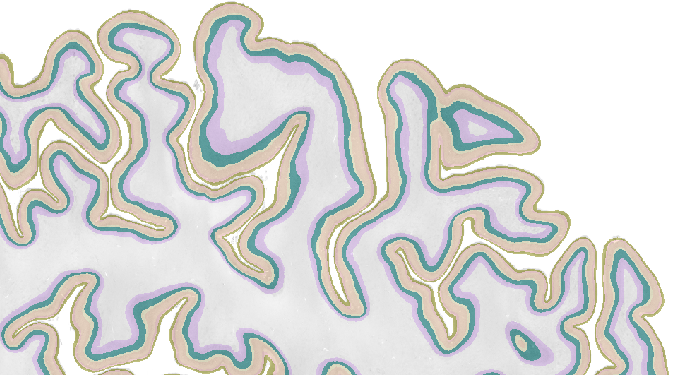

In [2]:
laminar_thickness_orig = helpers.downsample(datasets.load_laminar_thickness(normalize_by_total_thickness=False))

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


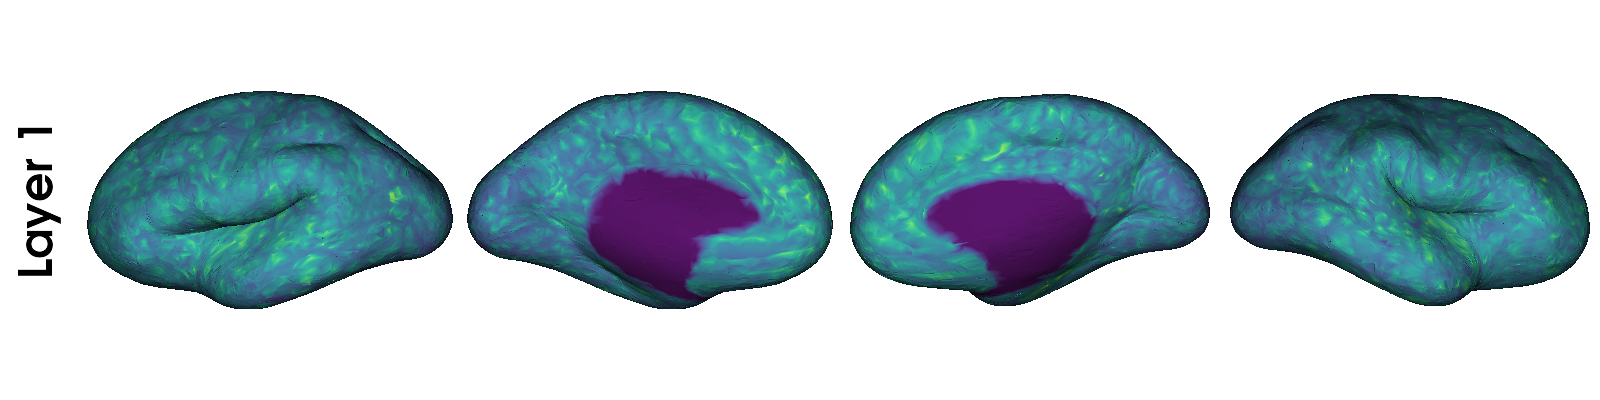

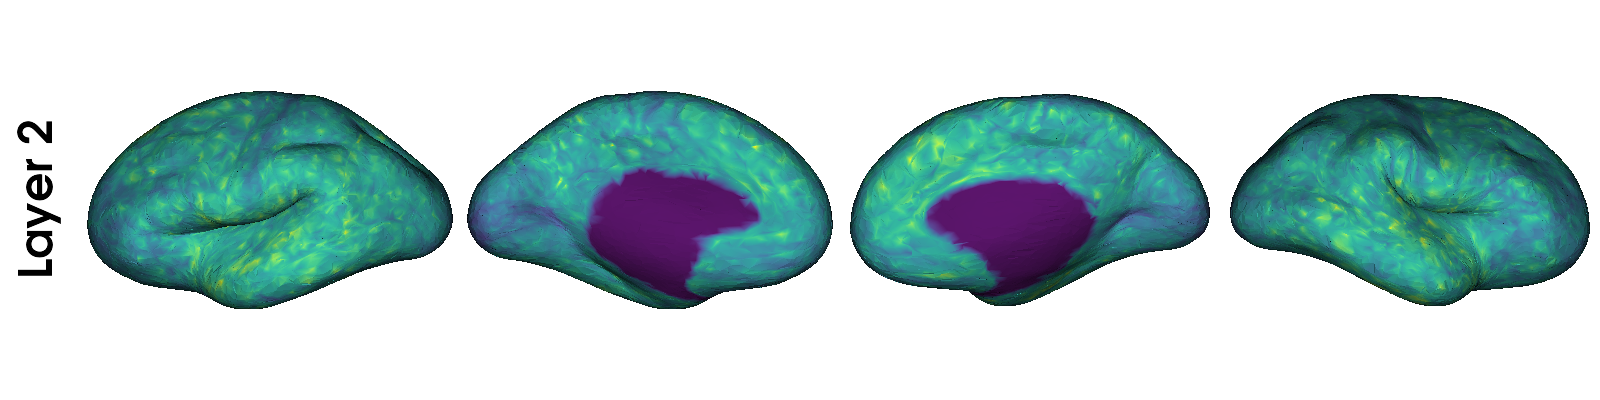

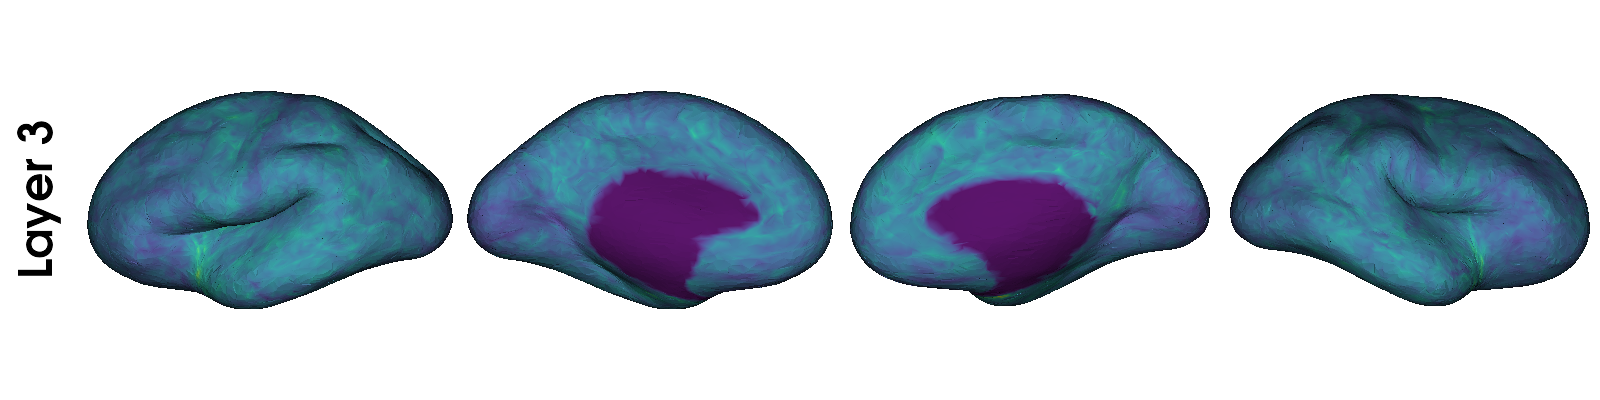

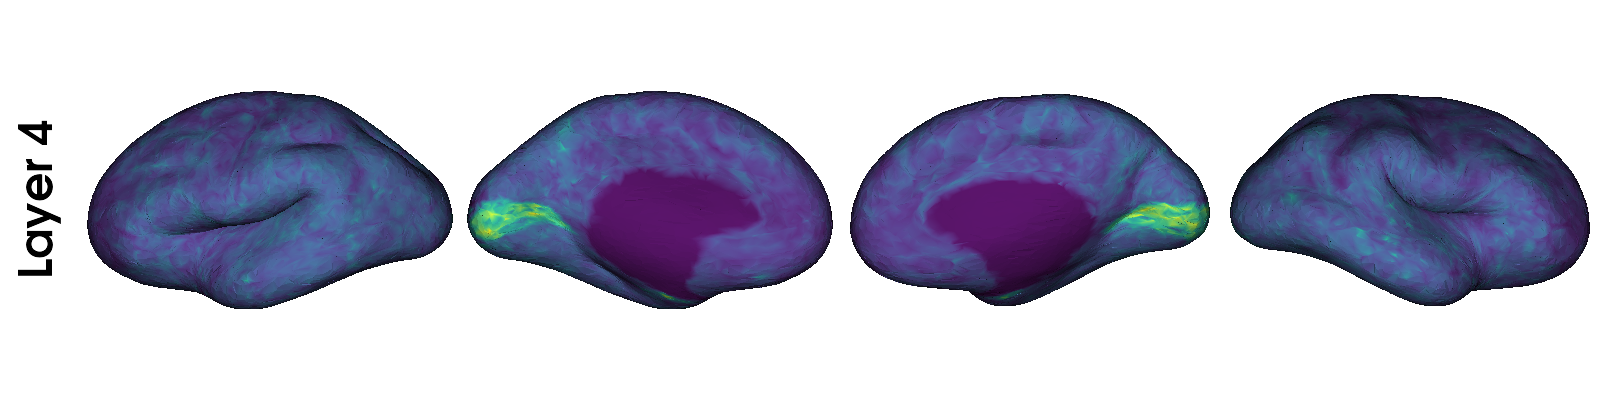

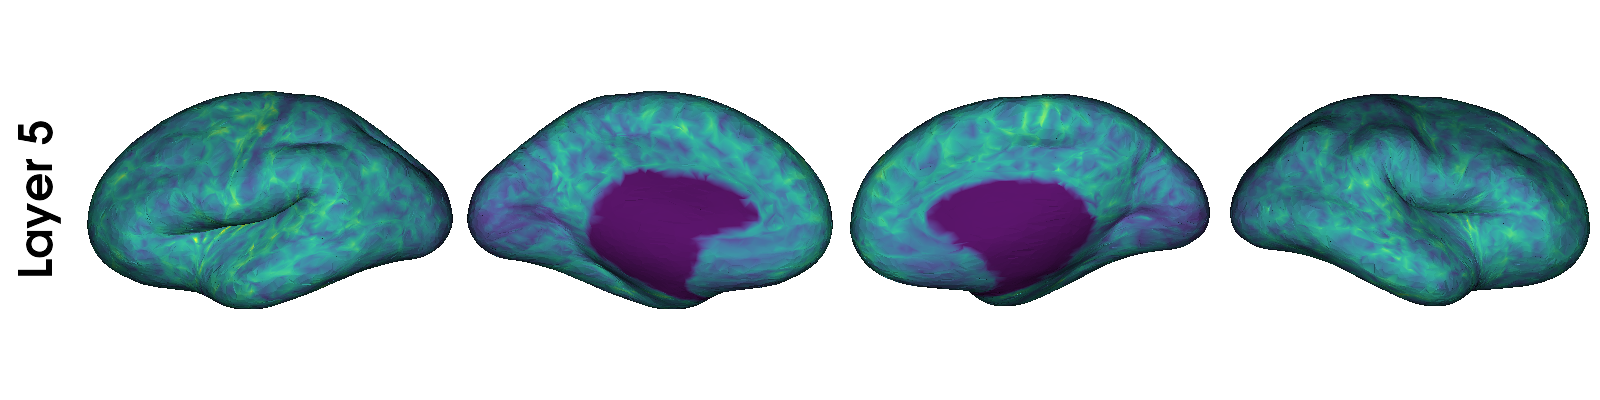

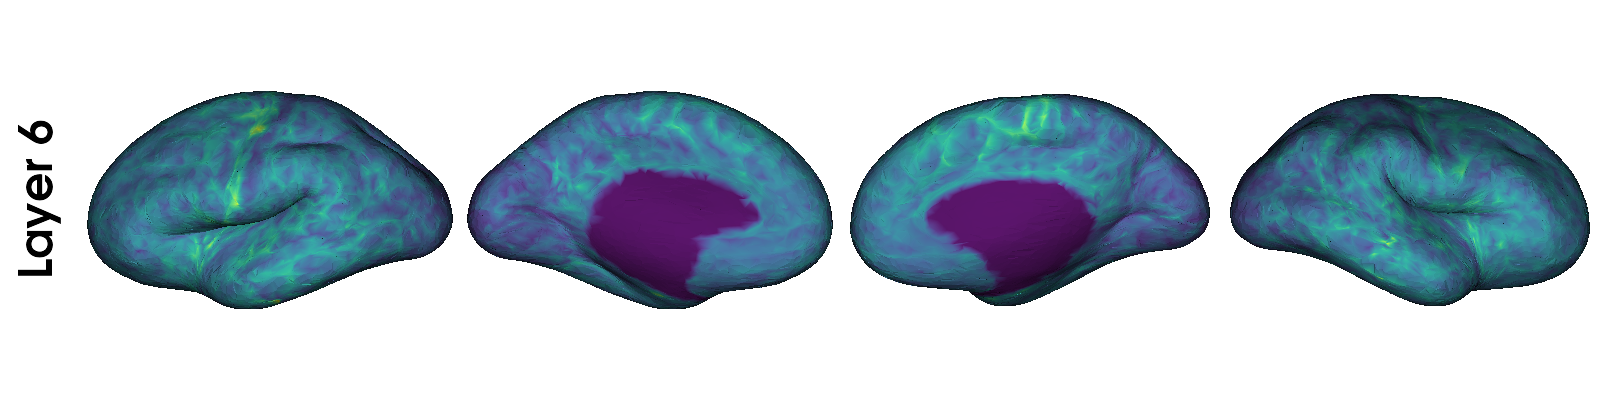

In [3]:
for num in range(1, 7):
    p = helpers.plot_surface(
        np.concatenate([laminar_thickness_orig['L'][:, num-1], laminar_thickness_orig['R'][:, num-1]]),
        inflate=True,
        label_text={'left':[f'Layer {num}']},
    )
    display(p)

## b) Pre-processing steps

Map of cortical types

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


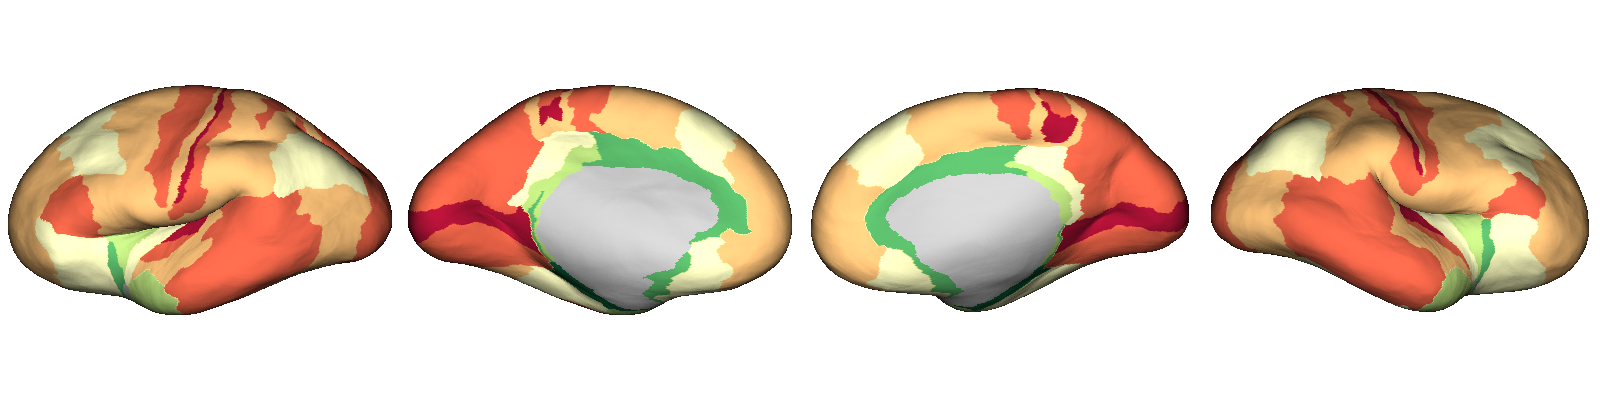

In [4]:
ctypes = surfaces.CorticalTypes(exc_regions=None, downsampled=False)

helpers.plot_surface(
    ctypes.surf_data,
    inflate=True,
    cmap='RdYlGn_r',
    plot_downsampled=False,
)

Note: The mask on the figure is created manually

Smoothing disc

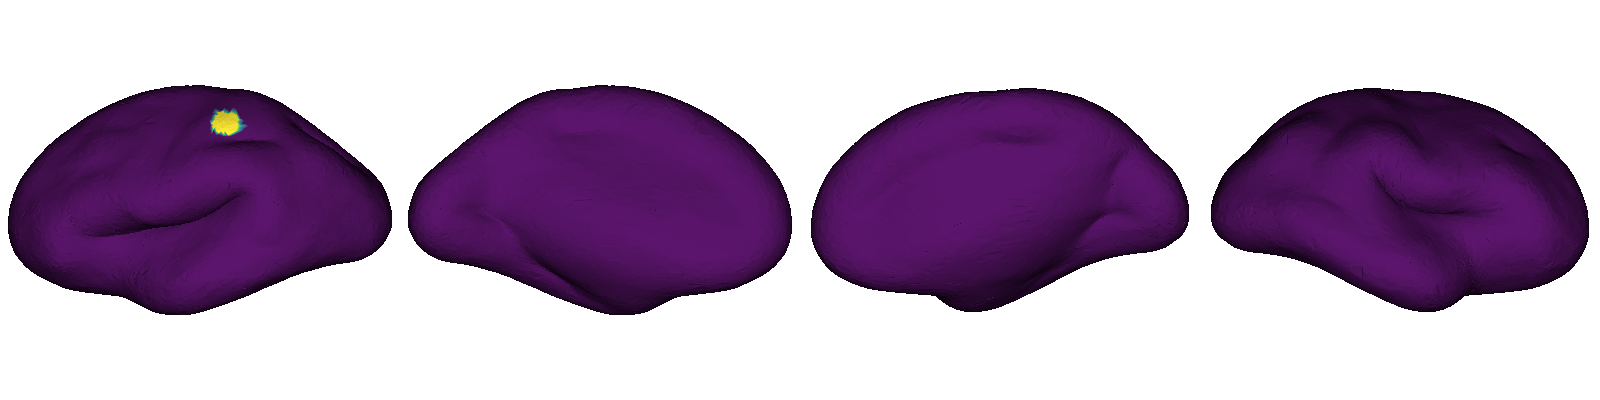

In [5]:
smoothed_laminar_thickness, discs = helpers.disc_smooth(laminar_thickness_orig, 10)

helpers.plot_surface(
    np.concatenate([discs['L'][2000].astype('int')*30, np.zeros(datasets.N_VERTICES_HEM_BB_ICO5)]),
    layout_style='row',
    inflate=True
)

Total thickness

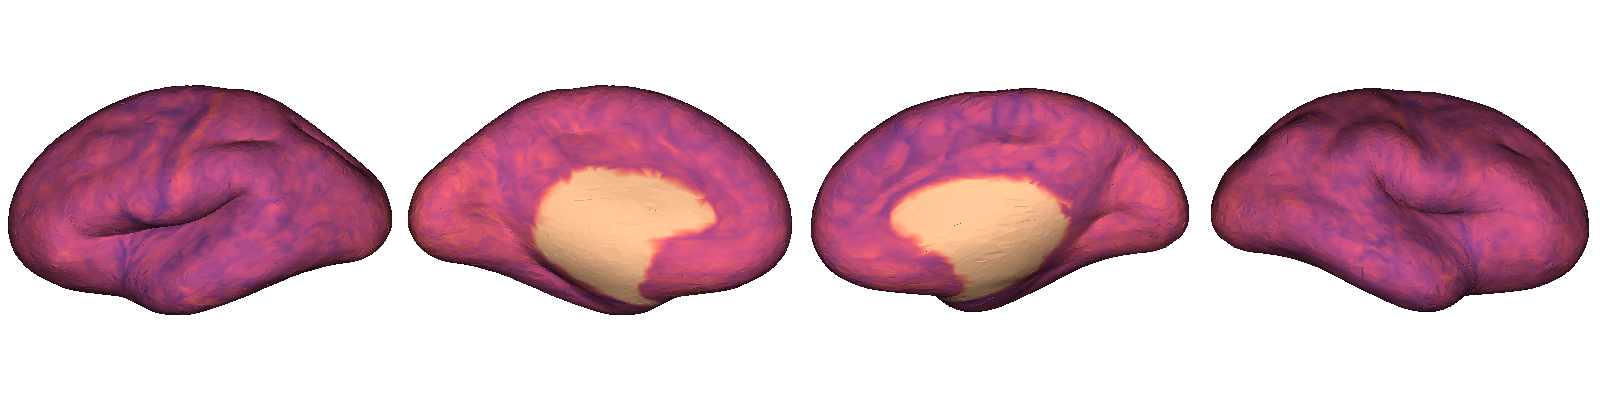

In [6]:
total_thickness = np.concatenate([laminar_thickness_orig['L'], laminar_thickness_orig['R']]).sum(axis=1)
helpers.plot_surface(
    total_thickness,
    inflate=True,
    cmap='flare',
)

Parcellation map

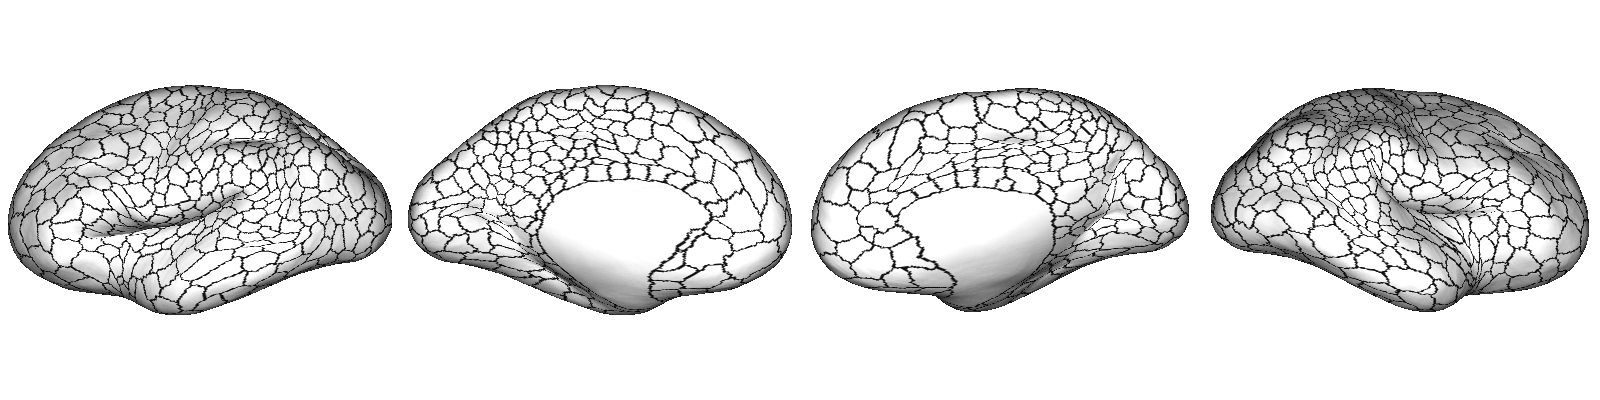

In [7]:
parcel_boundaries = helpers.get_parcel_boundaries('schaefer1000')
helpers.plot_surface(parcel_boundaries, plot_downsampled=False, cmap='binary')

## c) Parcellated laminar thickness profiles

In [2]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness')

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/code/figures/../matrices.py:1505: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(concat_parcellated_input_data.index.tolist(), rotation=90)


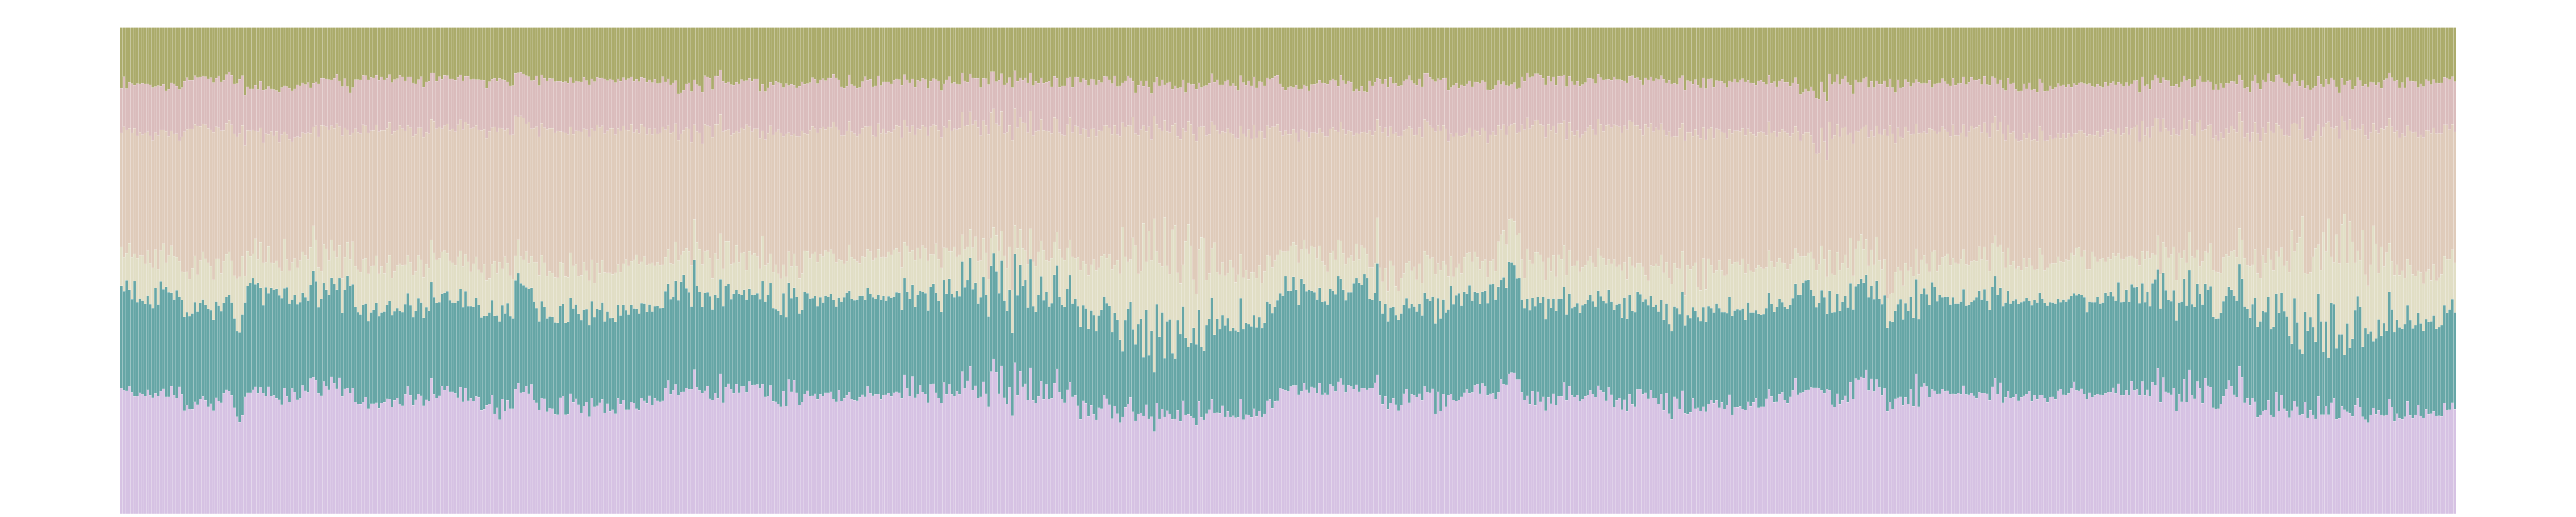

In [9]:
ltc.plot_parcels_profile()

## d) Laminar thickness covariance matrix

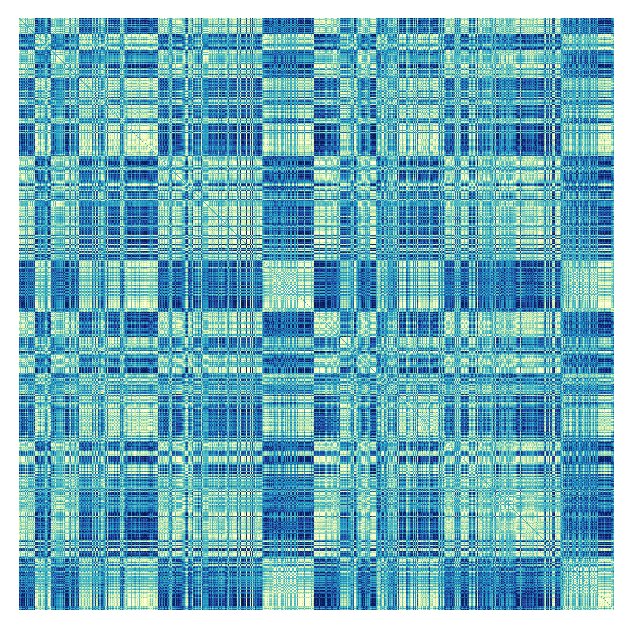

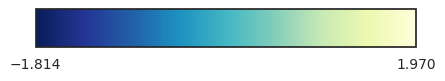

In [10]:
ltc.plot()

## e) Laminar thickness covariance gradient

In [3]:
ltcg = surfaces.MicrostructuralCovarianceGradients(ltc)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


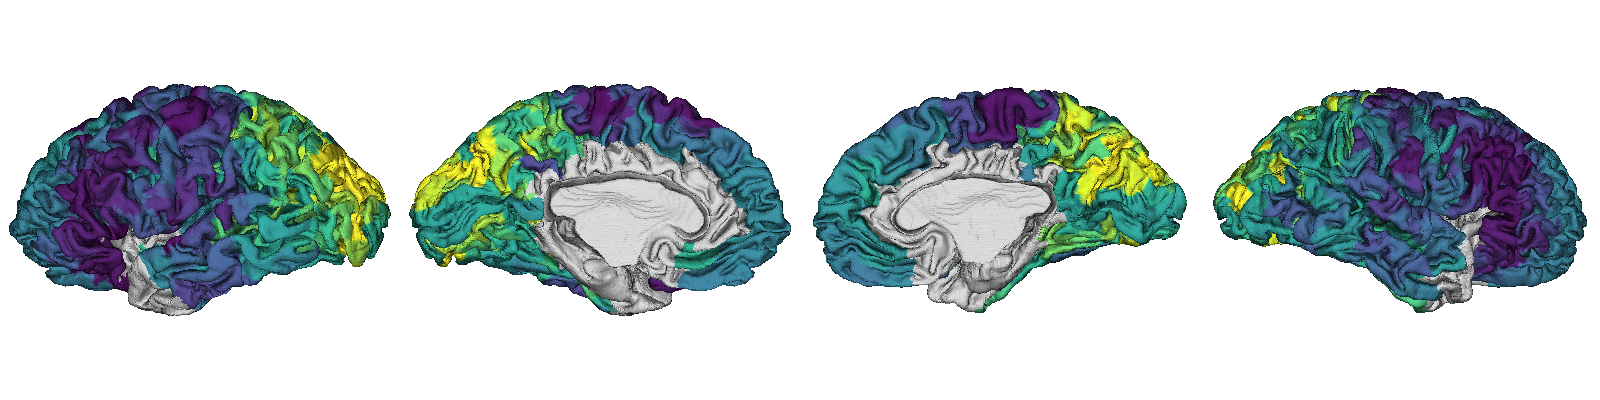

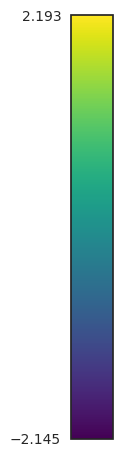

In [12]:
ltcg.plot(columns=['LTC G1'], cbar=True)

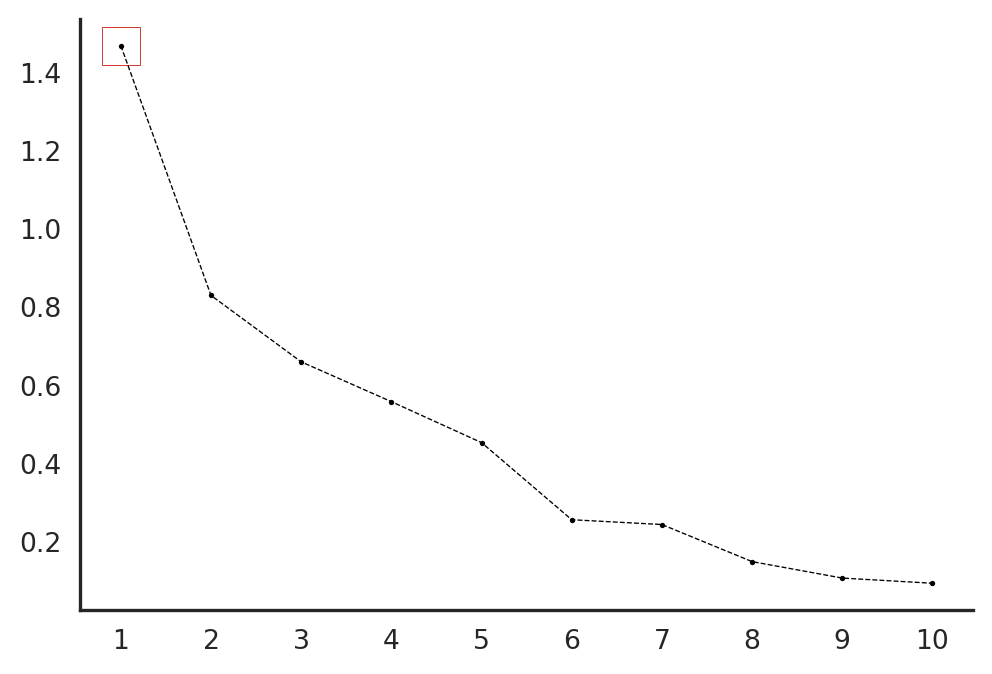

In [13]:
ltcg.plot_scree()

In [14]:
ltcg_max = surfaces.MicrostructuralCovarianceGradients(ltc, n_components_create=ltc.matrix.shape[0])
print('Variance explained by LTC G1: ', ltcg_max.lambdas[0] / ltcg_max.lambdas.sum())

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Variance explained by LTC G1:  0.28071386672529935


## f) LTC reordered by LTC G1

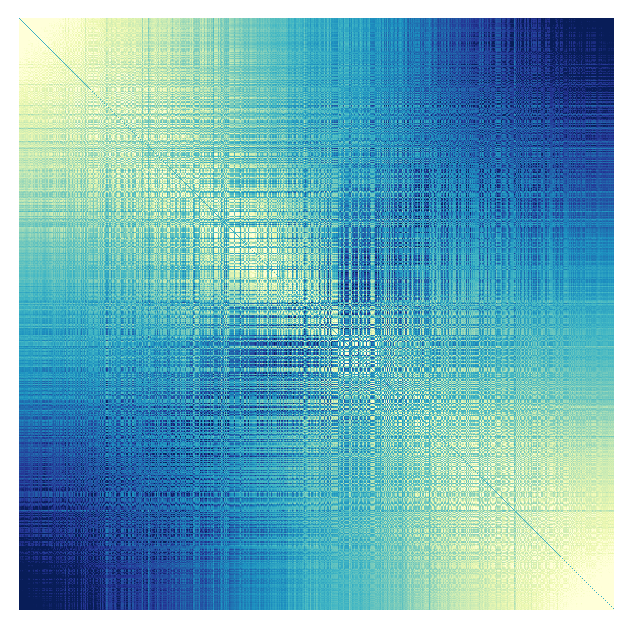

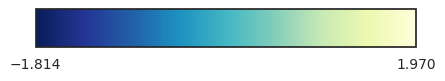

In [15]:
ltcg.plot_reordered_matrix()

## g) Relative thickness of individual layers across LTC G1

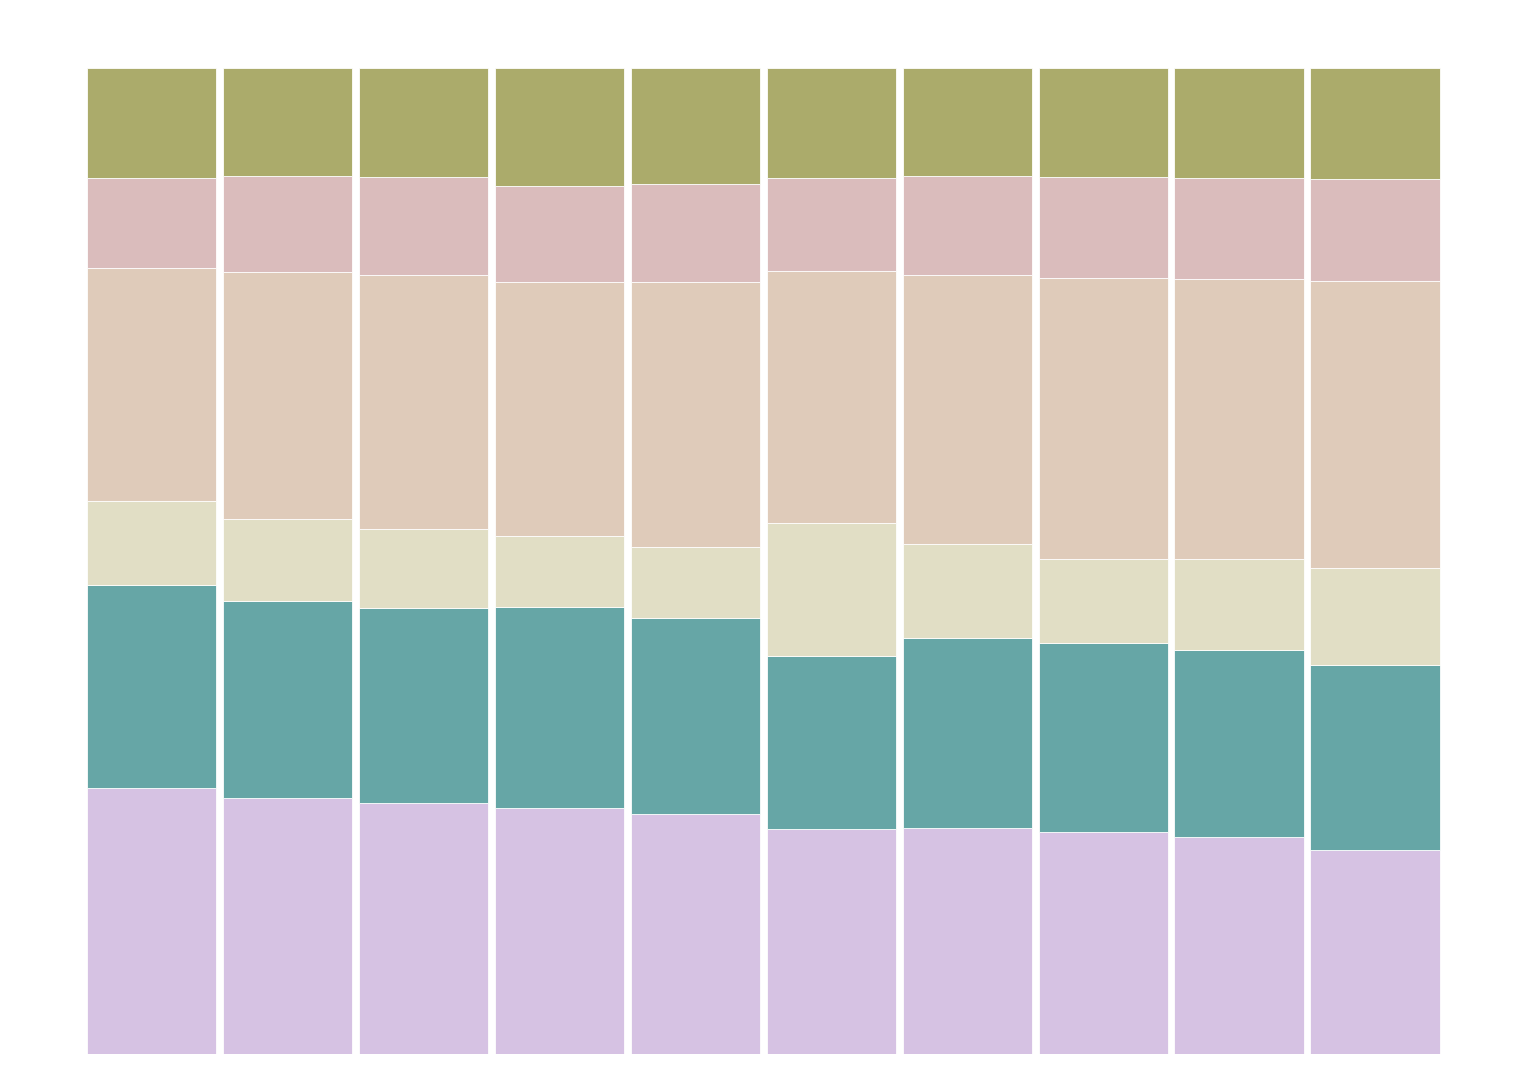

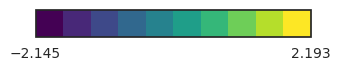

In [16]:
ltcg.plot_binned_profile()

Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/gradients_approach-pca_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-889.npz and have the same parcels

Correlation coefficients


LTC G1
Layer 1 -0.026309
Layer 2  0.423412
Layer 3  0.734088
Layer 4  0.165372
Layer 5 -0.353065
Layer 6 -0.821424


p-values


LTC G1
Layer 1   0.569
Layer 2   0.000
Layer 3   0.000
Layer 4   0.000
Layer 5   0.000
Layer 6   0.000

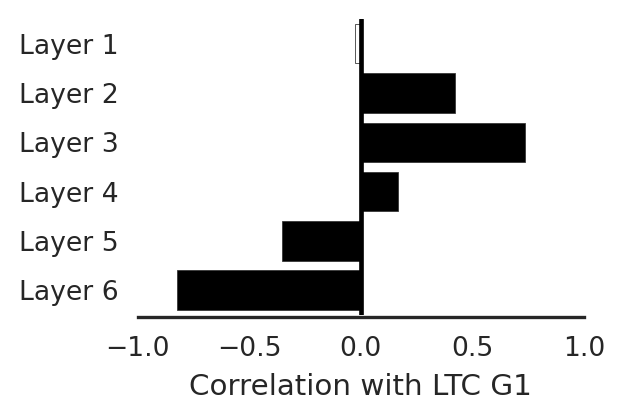

In [8]:
laminar_features = surfaces.LaminarFeatures(parcellation_name='schaefer1000')
laminar_features.columns = np.array([p.replace(' relative thickness', '') for p in laminar_features.columns])
laminar_features.parcellated_data.columns = laminar_features.columns
r, p = ltcg.correlate(
    laminar_features, 
    x_columns=['LTC G1'], 
    y_columns=[f'Layer {n}' for n in range(1, 7)],
    regplot=False
)
print("\nCorrelation coefficients")
display(r)
print("\np-values")
display(p)